<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/5%EC%A3%BC%EC%B0%A8/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


In [20]:
# 1. 필요한 모델들 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
# 2. 데이터 준비
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [22]:
# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, random_state=42
)

In [23]:
# 3. 모델별 학습 및 정확도 평가
# ------------------------------------------------------------
# 🤖 1) K-Nearest Neighbors (KNN)
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_score = metrics.accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors 정확도: {knn_score:.4f}")

K-Nearest Neighbors 정확도: 0.9889


In [24]:
# ------------------------------------------------------------
# 🌳 2) Decision Tree (DT)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_score = metrics.accuracy_score(y_test, dt_pred)
print(f"Decision Tree 정확도:     {dt_score:.4f}")

Decision Tree 정확도:     0.8417


In [25]:
# ------------------------------------------------------------
# 📊 3) Logistic Regression (LR)
# max_iter: 계산 횟수가 부족하다는 경고를 방지하기 위해 충분한 값을 줍니다.
lr_clf = LogisticRegression(max_iter=2000, random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_score = metrics.accuracy_score(y_test, lr_pred)
print(f"Logistic Regression 정확도: {lr_score:.4f}")

Logistic Regression 정확도: 0.9750


In [26]:
# ------------------------------------------------------------
# 🌲 4) Random Forest (RF)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_score = metrics.accuracy_score(y_test, rf_pred)
print(f"Random Forest 정확도:     {rf_score:.4f}")

Random Forest 정확도:     0.9722


In [27]:
# ------------------------------------------------------------
# 4. 샘플 이미지 하나를 선택하여 예측해보기
# (가장 성능이 좋게 나온 모델을 사용해볼 수 있습니다)
print("\n--- 샘플 데이터 예측 ---")
sample_index = 10
sample_image = X_test[sample_index]
actual_label = y_test[sample_index]


--- 샘플 데이터 예측 ---


In [28]:
# Random Forest 모델로 예측 수행
# 입력은 항상 2차원 행렬이어야 하므로 .reshape(1, -1) 사용
rf_single_pred = rf_clf.predict(sample_image.reshape(1, -1))

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


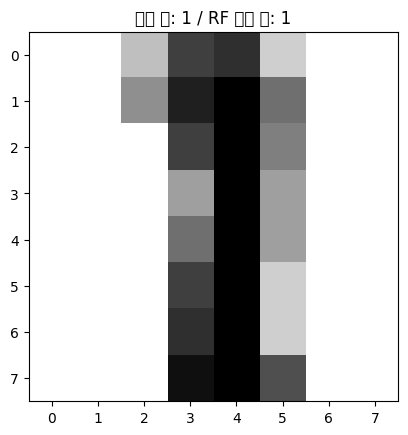

In [29]:
# 예측 결과 시각화
plt.imshow(sample_image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"실제 값: {actual_label} / RF 예측 값: {rf_single_pred[0]}")
plt.show()